In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importamos nuestro archivo de ánalisis.

nba=pd.read_csv("./output/basket_analysis.csv")

In [3]:
nba2019=nba[nba["Season"]=="2018 - 2019"]
nba2019

,League,Season,Stage,Player,Team,GP,MIN,2PM,2PA,3PM,...,1PA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
11,NBA,2018 - 2019,Regular_Season,LeBron James,Lakers,55,1937.4,558,1095,111,...,418,197,94,57,408,465,454,72,33,1505
12,NBA,2018 - 2019,Regular_Season,Kyle Kuzma,Lakers,70,2313.6,496,1087,128,...,250,133,170,60,322,382,178,41,26,1308
13,NBA,2018 - 2019,Regular_Season,Brandon Ingram,Lakers,52,1760.5,362,729,31,...,289,129,149,41,226,267,154,28,31,950
14,NBA,2018 - 2019,Regular_Season,Kentavious Caldwell-Pope,Lakers,82,2035.0,325,756,151,...,158,65,137,48,190,238,110,73,13,938
15,NBA,2018 - 2019,Regular_Season,JaVale McGee,Lakers,75,1670.8,400,641,1,...,152,108,208,195,371,566,52,47,148,897
16,NBA,2018 - 2019,Regular_Season,Reggie Bullock,Lakers,63,1878.9,245,594,148,...,85,65,109,22,151,173,129,40,12,711
17,NBA,2018 - 2019,Regular_Season,Josh Hart,Lakers,67,1714.8,189,464,92,...,80,58,147,35,213,248,93,64,40,525
18,NBA,2018 - 2019,Regular_Season,Lance Stephenson,Lakers,68,1122.7,184,432,73,...,73,86,111,32,183,215,140,41,7,491
19,NBA,2018 - 2019,Regular_Season,Lonzo Ball,Lakers,47,1422.6,185,456,75,...,48,103,114,54,197,251,255,69,19,465
20,NBA,2018 - 2019,Regular_Season,Mike Muscala,Lakers,64,1305.9,145,361,89,...,85,48,130,57,187,244,76,22,38,449


In [4]:
nba2020=nba[nba["Season"]=="2019 - 2020"]

In [5]:
def compare(P1, P2, stats=['GP', 'MIN', '2PM', '2PA', '3PM',
       '3PA', '1PM', '1PA', 'TOV', 'PF', 'ORB', 'DRB', 'REB', 'AST', 'STL',
       'BLK', 'PTS']):
    
    results={"Game played":(P1[stats[0]], P2[stats[0]]),
            #"Minutes played":(P1[stats[1]], P2[stats[1]]),
            "2 points made":(P1[stats[2]], P2[stats[2]]),
            "2 points attemps":(P1[stats[3]], P2[stats[3]]),
            "3 points made":(P1[stats[4]], P2[stats[4]]),
            "3 points attemps":(P1[stats[5]], P2[stats[5]]),
            "1 points made":(P1[stats[6]], P2[stats[6]]),
            "1 points attemps":(P1[stats[7]], P2[stats[7]]),
            "Turnovers":(P1[stats[8]], P2[stats[8]]),
            "Personal foults":(P1[stats[9]], P2[stats[9]]),
            "Offensive Rebounds":(P1[stats[10]], P2[stats[10]]),
            "Defensive Rebounds":(P1[stats[11]], P2[stats[11]]),
            "Rebounds":(P1[stats[12]], P2[stats[12]]),
            "Assists":(P1[stats[13]], P2[stats[13]]),
            "Steals":(P1[stats[14]], P2[stats[14]]),
            "Block":(P1[stats[15]], P2[stats[15]]),
            "Points":(P1[stats[16]], P2[stats[16]])}
    
    return results 

In [8]:
#Comparamos las estadísticas de 2019.

P1=nba2019[nba2019["Player"]==input("Player 1: ")]
P2=nba2019[nba2019["Player"]==input("Player 2: ")]
a=compare(P1, P2)
a

Player 1: LeBron James
Player 2: LeBron James


{'Game played': (11    55
  Name: GP, dtype: int64,
  11    55
  Name: GP, dtype: int64),
 '2 points made': (11    558
  Name: 2PM, dtype: int64,
  11    558
  Name: 2PM, dtype: int64),
 '2 points attemps': (11    1095
  Name: 2PA, dtype: int64,
  11    1095
  Name: 2PA, dtype: int64),
 '3 points made': (11    111
  Name: 3PM, dtype: int64,
  11    111
  Name: 3PM, dtype: int64),
 '3 points attemps': (11    327
  Name: 3PA, dtype: int64,
  11    327
  Name: 3PA, dtype: int64),
 '1 points made': (11    278
  Name: 1PM, dtype: int64,
  11    278
  Name: 1PM, dtype: int64),
 '1 points attemps': (11    418
  Name: 1PA, dtype: int64,
  11    418
  Name: 1PA, dtype: int64),
 'Turnovers': (11    197
  Name: TOV, dtype: int64,
  11    197
  Name: TOV, dtype: int64),
 'Personal foults': (11    94
  Name: PF, dtype: int64,
  11    94
  Name: PF, dtype: int64),
 'Offensive Rebounds': (11    57
  Name: ORB, dtype: int64,
  11    57
  Name: ORB, dtype: int64),
 'Defensive Rebounds': (11    408
  Na

TypeError: float() argument must be a string or a number, not 'NoneType'

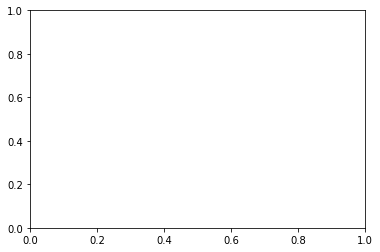

In [10]:
names = list(a.keys())
values = list(a.values())
plt.bar(0,values[0],tick_label=names[0])
plt.bar(1,values[1],tick_label=names[1])
plt.bar(2,values[2],tick_label=names[2])
plt.bar(3,values[3],tick_label=names[3])
plt.bar(4,values[4],tick_label=names[4])
plt.bar(5,values[5],tick_label=names[5])
plt.bar(6,values[6],tick_label=names[6])
plt.bar(7,values[7],tick_label=names[7])
plt.bar(8,values[8],tick_label=names[8])
plt.bar(9,values[9],tick_label=names[9])
plt.bar(10,values[10],tick_label=names[10])
plt.bar(11,values[11],tick_label=names[11])
plt.bar(12,values[12],tick_label=names[12])
plt.bar(13,values[13],tick_label=names[13])
plt.bar(14,values[14],tick_label=names[14])
plt.bar(15,values[16],tick_label=names[15])
plt.bar(16,values[16],tick_label=names[16])
plt.xticks(range(0,17),names,rotation=45)
plt.show()

In [11]:
def percentage (P1, stats=['GP', 'MIN','2PM', '2PA', '3PM',
       '3PA', '1PM', '1PA']):
    res={"% acierto en tiros de campo":(P1[stats[2]]/ P1[stats[3]]),
         "% acierto en triples":(P1[stats[4]]/ P1[stats[5]]),
         "% acierto en tiros libres":(P1[stats[6]]/ P1[stats[7]])}

    return res

In [12]:
P1=nba2019[nba2019["Player"]==input("Player 1: ")]
b=percentage(P1)
b

Player 1: LeBron James


{'% acierto en tiros de campo': 11    0.509589
 dtype: float64,
 '% acierto en triples': 11    0.33945
 dtype: float64,
 '% acierto en tiros libres': 11    0.665072
 dtype: float64}

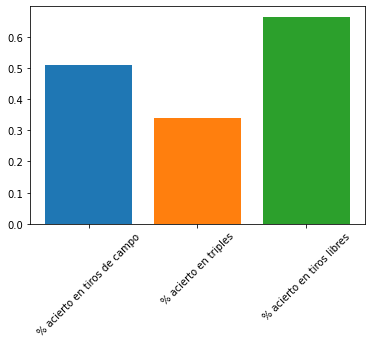

In [13]:
names = list(b.keys())
values = list(b.values())
plt.bar(0,values[0],tick_label=names[0])
plt.bar(1,values[1],tick_label=names[1])
plt.bar(2,values[2],tick_label=names[2])
plt.xticks(range(0,3),names,rotation=45)
plt.show()

<AxesSubplot:ylabel='PTS'>

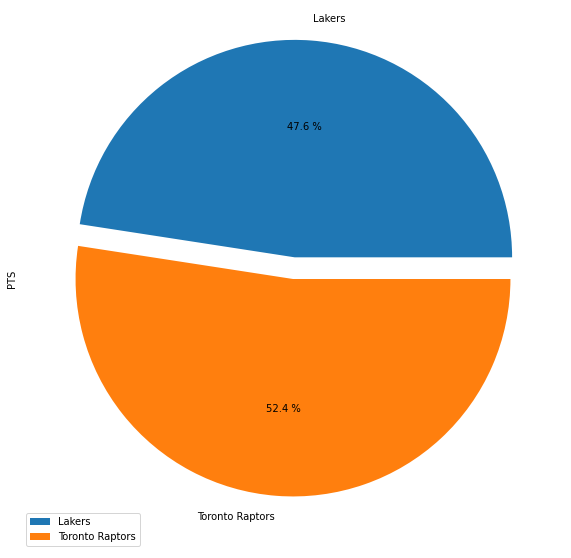

In [14]:
# Vamos a comparar ahora el total de puntos por equipo.

total_points=nba2019.groupby(["Team"]).agg({"PTS":"sum"})
total_points.reset_index()
desfase = (0.1,0)
total_points.plot.pie(y='PTS', autopct="%0.1f %%", explode=desfase, figsize=(10,10))

,perc_accuracy_2
Team,
Lakers,0.469169
Toronto Raptors,0.504915


<AxesSubplot:xlabel='Team'>

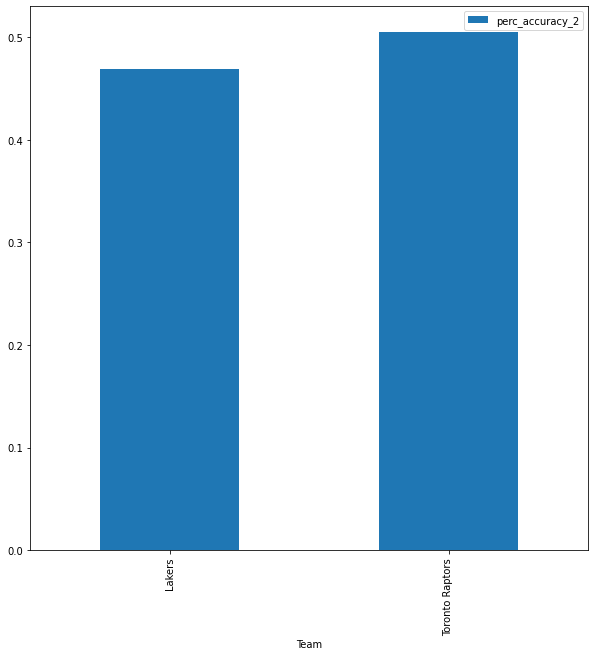

In [27]:
pm2=nba2019.groupby(["Team"]).agg({"2PM":"sum"})
pm2.reset_index()
pa2=nba2019.groupby(["Team"]).agg({"2PA":"sum"})
pa2.reset_index()
pm2["2PM"]=pm2["2PM"].apply(lambda x: x/pa2["2PA"])
pm2.columns=["perc_accuracy_2"]
perc_accuracy_2=pm2
display(perc_accuracy_2)
desfase = (0.1,0)
perc_accuracy_2.plot.bar(figsize=(10,10))

,perc_accuracy_3
Team,
Lakers,0.340659
Toronto Raptors,0.377416


<AxesSubplot:xlabel='Team'>

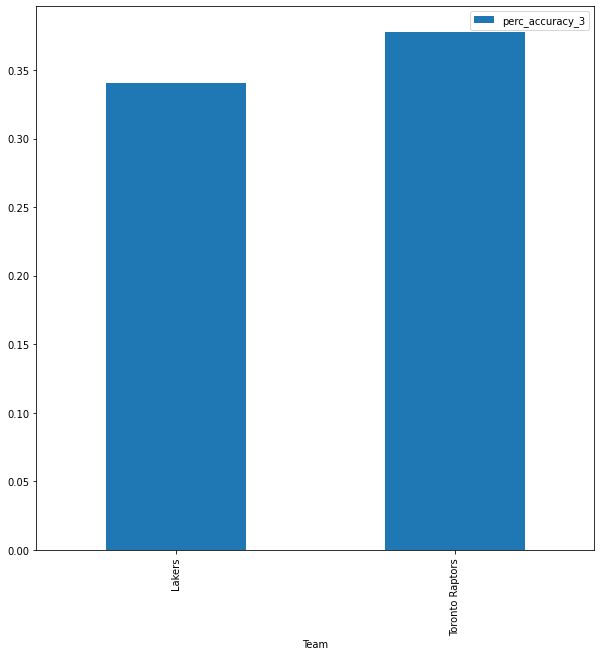

In [29]:
pm3=nba2019.groupby(["Team"]).agg({"3PM":"sum"})
pm3.reset_index()
pa3=nba2019.groupby(["Team"]).agg({"3PA":"sum"})
pa3.reset_index()
pm3["3PM"]=pm3["3PM"].apply(lambda x: x/pa3["3PA"])
pm3.columns=["perc_accuracy_3"]
perc_accuracy_3=pm3
display(perc_accuracy_3)
desfase = (0.1,0)
perc_accuracy_3.plot.bar(figsize=(10,10))

,perc_accuracy_1
Team,
Lakers,0.703188
Toronto Raptors,0.867826


<AxesSubplot:xlabel='Team'>

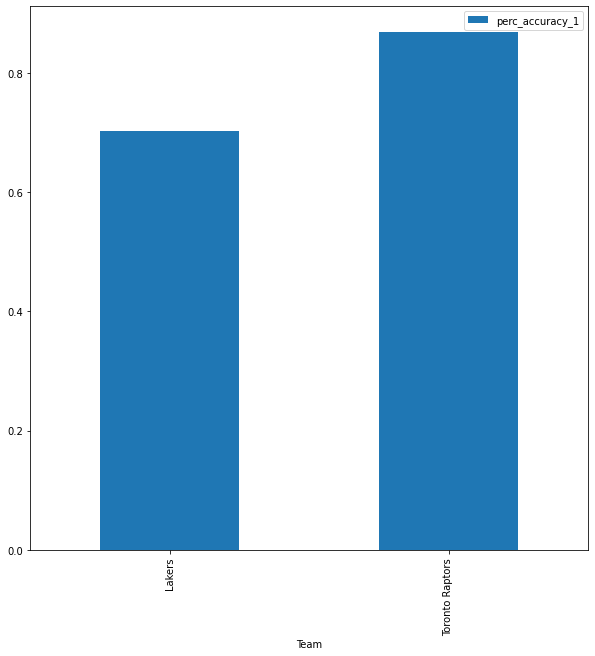

In [30]:
pm1=nba2019.groupby(["Team"]).agg({"1PM":"sum"})
pm1.reset_index()
pa1=nba2019.groupby(["Team"]).agg({"1PA":"sum"})
pa1.reset_index()
pm1["1PM"]=pm1["1PM"].apply(lambda x: x/pa1["1PA"])
pm1.columns=["perc_accuracy_1"]
perc_accuracy_1=pm1
display(perc_accuracy_1)
desfase = (0.1,0)
perc_accuracy_1.plot.bar(figsize=(10,10))